# Hyper tuned AdaBoost Model for Credit Card Fraud Detection 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score,precision_score, recall_score, f1_score
import numpy as np
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [2]:
df=pd.read_csv("cleaned.csv")
# Drop 'Class' column and assign X values
X = df.drop(columns=['Class'])  
# Target variable is 'Class'
y = df['Class']  
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (984, 31)
Shape of y: (984,)


In [3]:
df.isnull().sum().sum()

0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Stanadrd Scaling

In [6]:
scaler = StandardScaler()
X_train_sscaled = scaler.fit_transform(X_train)
X_test_sscaled = scaler.fit_transform(X_test)


In [7]:
adaboost_model = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1.0] }

grid_search = GridSearchCV(adaboost_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_sscaled, y_train)

# Best parameters 
best_params = grid_search.best_params_

# Using the best model to predict on test data
best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test_sscaled)

# Calculating performance of Model
accuracy_std = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy_std)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy: 0.9187817258883249
Precision: 0.9555555555555556
Recall: 0.8775510204081632
F1 Score: 0.9148936170212767


# Quantile Scaling

In [8]:
scaler_quantile = QuantileTransformer()
X_train_qscaled = scaler_quantile.fit_transform(X_train)
X_test_qscaled = scaler_quantile.fit_transform(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (787). n_quantiles is set to n_samples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (197). n_quantiles is set to n_samples.
  warnings.warn(


In [9]:
adaboost_model = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1.0] }

grid_search = GridSearchCV(adaboost_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_qscaled, y_train)

best_params = grid_search.best_params_

best_adaboost = grid_search.best_estimator_
y_pred = best_adaboost.predict(X_test_qscaled)

accuracy_qan = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy_qan)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy: 0.9238578680203046
Precision: 0.946236559139785
Recall: 0.8979591836734694
F1 Score: 0.9214659685863874


In [10]:
print('Performance of AdaBoost with Standard Scaling',accuracy_std )
print('Performance of AdaBoost with Quantile Scaling',accuracy_qan )

Performance of AdaBoost with Standard Scaling 0.9187817258883249
Performance of AdaBoost with Quantile Scaling 0.9238578680203046


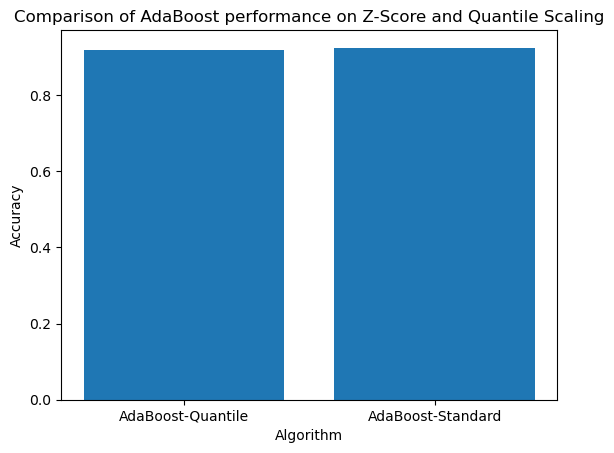

In [11]:
Algo = ['AdaBoost-Quantile', 'AdaBoost-Standard']
values = [accuracy_std,accuracy_qan]
plt.bar(Algo, values)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of AdaBoost performance on Z-Score and Quantile Scaling')
plt.show()